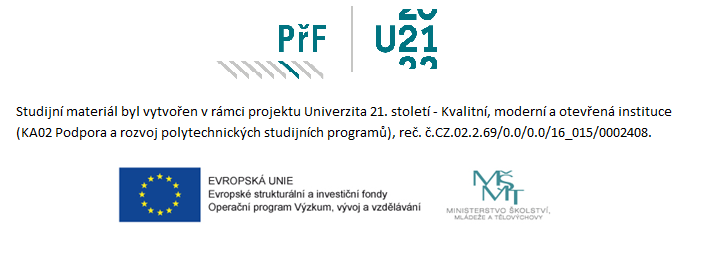

# Linearní klasifikátory a jejich rozšíření

Nejprve si **zopakujte** použití *lineární regrese jako klasifikátoru* z druhého sheetu.

Konstruujeme-li lineární klasifikátor, tak se snažíme oddělit (diskriminovat) body jednotlivých tříd v příznakovém prostoru pomocí přímky, resp. roviny ve více dimenzích. V případě, že to lze, říkáme, že daná úloha je *lineárně separabilní*, resp. že dané množiny bodů jsou lineárně separabilní. V případě, že to možné není, mluvíme o tom, že úloha není lineárně separabilní.
Na obrázku níže jsou obě situace znázorněny. Předpokládáme binární klasifikaci. Příkladem problému, který není lineárně separabilní je tzv. problém logické [funkce XOR](https://dev.to/jbahire/demystifying-the-xor-problem-1blk).


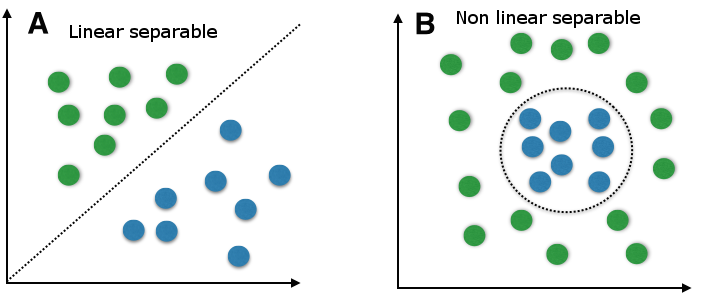

Obrázek převzat z [https://leonardoaraujosantos.gitbook.io/artificial-inteligence/machine_learning/supervised_learning/linear_classification](https://leonardoaraujosantos.gitbook.io/artificial-inteligence/machine_learning/supervised_learning/linear_classification)

Budeme uvažovat, že jednotlivé datové body v příznakovém prostoru jsou popsány vektorem $x$, tedy jedná se o řádky matice $X$ z dřívějšího textu. Rovnice roviny (přímky) je dána vahami $w$, které určují její sklon a posunem $b$ (*biasem*). Chceme tedy najít takové váhy $w$ a $b$ roviny, aby body příslušející jedné třídě byly nad touto rovinou a body příslušející druhé rovině byly pod ní. Pokud budeme uvažovat, že příslušnost k dané třídě je label $y$, který nabývá hodnot $\pm 1$, tak pokud budeme mít určeny váhy $w$ a $b$, tak můžeme klasifikovat neznámý bod $x$ pomocí rovnice:
\begin{equation}
\hat{y}=\mbox{sign}(w^T\cdot x +b).
\end{equation}

Pro zjednodušení se obvykle zavádí nová (nultá) dimense, která odpovídá biasu tak, že $w_0=b$ a $x_0=1$ a klasifikaci provádíme dle vztahu:
\begin{equation}
\hat{y}=\mbox{sign}(w^T\cdot x).
\end{equation}

**Úkol k promyšlení I**

Ukažte, že pro gradient funkce $w^T\cdot x + b$ platí $\nabla(w^T\cdot x + b)=w$.

**Úkol k promyšlení II**

Rozmyslete si, jak souvisí normálový vektor dané separační roviny s $w$.

## Perceptron

*Perceptron* je nejjednodušší model neuronové sítě, viz další sheety. Na obrázku, níže, je schematicky zachycen:

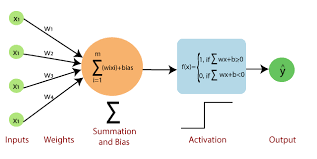

Zdroj obrázku [https://medium.com/nerd-for-tech/flux-prediction-using-single-layer-perceptron-and-multilayer-perceptron-cf82c1341c33](https://medium.com/nerd-for-tech/flux-prediction-using-single-layer-perceptron-and-multilayer-perceptron-cf82c1341c33)

Výše uvedený obrázek ukazuje, schéma reakce modelu perceptronu. Na vstupu máme nějaká data, tedy bod $x$ v příznakovém prostoru, model má nějaké váhy ($w$ a $b$) a sečte jednotlivé informace ze vstupu s tím, že každému vstupu dá nějakou váhu a na základě toho se určí výstup (na obrázku $\hat{y}$). Výstup je dán tzv. *aktivační funkcí*. V případě perceptronu se jako aktivační funkce bere jednotkový skok. Toto vede k tomu, že výstup nabývá hodnot $0/1$, v čemž se mírně odlišuje od námi použité funkce *signum*, což je ale jen drobnost. **Rozmyslete** si, že funkce $\frac{\mbox{sign}(w^T\cdot x)+1}{2}$ má v "podstatě" tyto vlastnosti jako výše uvedený perceptron.

Tedy model perceptronu odpovídá výše uvedenému modelu *lineárního klasifikátoru*.
V dalším budeme postupovat trochu obecněji. Matematické detaily je možné nalézt [zde](https://course.ccs.neu.edu/cs6140sp15/2_GD_REG_pton_NN/lecture_notes/lectureNotes_Perceptron.pdf).


### Ztrátová funkce

Obvykle se úloha nastavení vah formuluje jako optimalizační problém, kde se hledá minimum tzv. *ztrátové funkce* (*loss function*). V případě perceptronu se používá tato funkce:
\begin{equation}
J(w) = \sum_i\max(0, -y_i w^T\cdot x_i),
\end{equation}
kde sumaci provádíme přes všechna data. Význam je následující. Funkce $\max(0, -y_i w^T\cdot x_i)$ se chová tak, že pokud $y_i=1$ a $w^T\cdot x_i\ge0$, tedy příklad je klasifikován správně, tak argument funkce $\max$ je záporný a nedochází k načítání hodnot. Podobně v případě $y_i=-1$ a $w^T\cdot x_i\le0$. Jinak k načítání hodnot dochází.



### Minimalizace ztrátové funkce

Obvykle se v algoritmech strojového učení používá některá z variant *spádových metod* ( [metoda největšího spádu](https://en.wikipedia.org/wiki/Gradient_descent), gradientní metoda).

Jedná se o iterační algoritmus, kdy dochází ke změně vektoru vah $w$. Algoritmus posouvá bod daný vektorem vah $w$ ve směru největšího spádu (gradientu), viz obrázek níže, kde ovšem místo $x$ se jedná o váhy $w$.
Algoritmus je dán:
\begin{equation}
w^{k+1}=w^{k} - \eta^{k}\nabla_{w}J(w),
\end{equation}
kde horní index $k$ označuje iteraci, $\eta^{k}\in R$ je délka kroku metody a $\nabla_{w}J(w)$ je gradient, čili vektor parciálních derivací účelové funkce $J(w)$ dle vah $w$.

**Poznámka**

Obvykle se v optimalizaci předpokládá, že minimalizovaná funkce je "hezká", tedy má všechny derivace, apod. Tímto se zde nebudeme znepokojovat, neboť konvergenci níže ukázaného algoritmu lze dokázat, viz [zde](https://course.ccs.neu.edu/cs6140sp15/2_GD_REG_pton_NN/lecture_notes/lectureNotes_Perceptron.pdf).

Další zde nediskutovanou věcí je volba kroku $\eta$. Tím se zabýváme v optimalizaci. Zde jen podotkněme, že když $\eta$ bude malé, tak to bude fungovat.

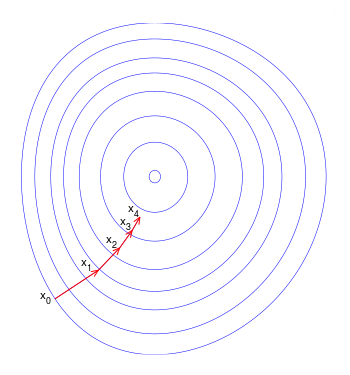

Zdroj [https://cs.wikipedia.org/wiki/Gradientn%C3%AD_sestup](https://cs.wikipedia.org/wiki/Gradientn%C3%AD_sestup)

### Učení perceptronu

Sumace ve ztrátové funkci se nemusí dělat přes celý dataset, ale pouze přes jeho část, dávku (*batch*, *minibatch*). Jedním z důvodů je i velká časová náročnost výpočtu, ale jsou i jiné důvody.
Algoritmy se liší, ale obvykle se postupuje tak, že se vybere jedna dávka, udělá se krok gradientní metodou (nebo její variantou), pak se vybere další dávka a udělá se další krok atd. V případě, že takto projdeme celý dataset, tak mluvíme o *epoše* učení.
Pojďme v dalším uvažovat, že dávka je velikosti jedna. Tedy budeme v každém kroku vybírat jen jeden příklad. Ztrátová funkce má v tomto případě tvar $J(w)=\max(0, -y_i w^T\cdot x_i)$  a pro její gradient platí:
\begin{equation}
\nabla_{w}J(w) =
\left\{
    \begin{array}{lr}
        0, & \mbox{když } x_i\mbox{ je klasifikováno správně} \\
        -y_ix_i, & \mbox{když } x_i\mbox{ je klasifikováno špatně}
    \end{array}
\right\}.
\end{equation}
Protože v případě správně klasifikovaného příkladu je gradient ztrátové funkce nulový, tak nás zajímají pouze situace, kdy je daný příklad klasifikován špatně. Dosazením výše uvedeného do algoritmu metody největšího spádu dostáváme algoritmus perceptronového učení.

Na ukázce níže je jeho implementace v Pythonu, kde používáme i výše uvedené epochy. Vnitřní cyklus prochází přes všechny příklady a vnější zajišťuje proběhnutí daného počtu epoch. Počáteční hodnoty vah $w$ jsou generovány náhodně. Hodnota kroku $\eta$ je zmenšována po každé proběhlé epoše.


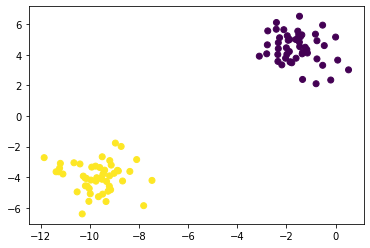

In [ ]:
#import knihoven a  vygenerování datasetu
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
y[y==0]=-1
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
# vlastni algoritmus uceni
# parametry uceni
epochs = 10 # pocet epoch
etha = 0.1 # velikost kroku
# nahodne vahy
w = random.rand(3) # w0=b,w1, w2 vahy
# rozsireni matice X pro snazsi manipulaci
X_mod = np.hstack((np.ones((X.shape[0],1)),X))
# algoritmus behu
for epoch in range(epochs): # pres vsechny epochy
  misclassified=0
  for i, x in enumerate(X_mod): # pres vsechny priklady
    if y[i]*np.dot(x,w) < 0: # testuj zda je to spravne klasifikovano
      w = w + etha*y[i]*x
      misclassified+=1
  etha/=2
  print(f"Epoch:{epoch} Misclassified:{misclassified}")

Epoch:0 Misclassified:3
Epoch:1 Misclassified:0
Epoch:2 Misclassified:0
Epoch:3 Misclassified:0
Epoch:4 Misclassified:0
Epoch:5 Misclassified:0
Epoch:6 Misclassified:0
Epoch:7 Misclassified:0
Epoch:8 Misclassified:0
Epoch:9 Misclassified:0


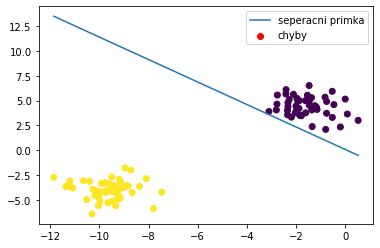

In [ ]:
# vykresleni
y_hat = np.sign(np.dot(X_mod,w))
x_line = np.linspace(np.min(X[:,0]),np.max(X[:,0]), 100)
y_line = -w[0]/w[2]-w[1]/w[2]*x_line
plt.scatter(X[:,0], X[:,1], c=y_hat)
plt.scatter(X[y!=y_hat,0], X[y!=y_hat,1], c='red',label='chyby')
plt.plot(x_line,y_line, label='seperacni primka')
plt.legend()

#### Úkoly pro samostanou práci

Ověřte vliv parametru $\eta$ na učení. Dále si promyslete, proč při každém spuštění učícího algoritmu při pevně daných bodech je separační přímka jiná. Kolik vlastně existuje separačních přímek?

## Logistická regrese

V případě perceptronu je přechod mezi třídami skokový, neboť použitá aktivační funkce je nespojitá. V reálném světě jsou přechody mezi třídami spojité. Např. když mám o korunu větší či menší, příjem než je průměrná mzda, tak jsem bohatý, či chudý?

Z tohoto důvodu používá logistická regrese jinou aktivační funkci, sigmoidu $s(x) = \frac{1}{1+e^{-x}}$, viz druhý sheet, či obrázek níže, která nám pak udává pravděpodobnost příslušnosti do dané třídy, neboť obor hodnot $Hs=(0,1)$. Výsledná predikce příslušnosti příkladu $x$ do dané třídy je pak dána:
\begin{equation}
\hat{y}=\frac{1}{1+e^{-w\cdot x}},
\end{equation}
kde $w$ je vektor vah, $x$ je příslušný bod v příznakovém prostoru a $w\cdot x=\sum_k w_k x_k$ je skalární součin dvou vektorů.



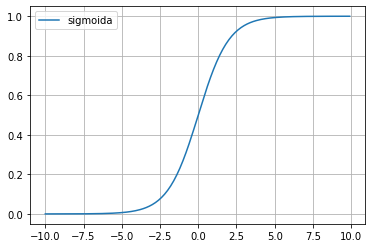

In [ ]:
xsigmo = np.arange(-10, 10, 0.1)
ysigmo = 1/(1+np.exp(-xsigmo))
plt.plot(xsigmo, ysigmo, label = 'sigmoida')
plt.legend()
plt.grid()


Ve skutečnosti nejde o pravděpodobnost, ale obvykle se to tak interpretuje. Protože nás zajímá binární klasifikace, tak pokud je $p(x \in A)$ pravděpodobnost příslušnosti do třídy $A$, tak pro pravděpodobnost příslušnosti do třídy $B$ platí $p(x \in B)=1-p(x \in A)$. Pokud je $p(x \in A) > p(x \in B)$, tak přiřadíme prvek třídě $A$, v opačném případě třídě $B$. Hranici neřešíme.

Další rozdíl oproti perceptronu bude v tom, že nyní uvažujeme, že **labely $y$ nabývají hodnot $0/1$**, což odpovídá výše uvedené pravděpodobnostní interpretaci. Reálně (dle hodnoty labelu) prvek patří do jedné ze dvou tříd, tedy příslušnost k dané třídě je $1$ a k druhé pak $0$.

####Úkol pro samostatnou práci

Uvědomme si, že ve skutečnosti je hodnota $\hat{y}$ pro dané $x$ funkcí vah. Jako cvičení na výpočet derivace a pomocí úpravy ukažte, že platí:
\begin{equation}
\frac{\partial\hat{y}(w)}{\partial w_k} =\frac{\partial\frac{1}{1+e^{-w\cdot x}}}{\partial w_k} = \hat{y}(w)(1-\hat{y}(w))x_k,
\end{equation}
zde upozorňuji, že $x_k$ značí $k-$tou složku vektoru $x$.

###Ztrátová funkce a její minimalizace

Proto, abychom mohli úlohu učení formulovat jako optimalizační problém, zavedeme ztrátovou funkci. Nabízí se možnost formulace ve smyslu nejmenších čtverců:
\begin{equation}
J(w)=\frac{1}{\#X}\sum_i(y_i-\hat{y}_i)^2,
\end{equation}
kde $\#X$ představuje počet příkladů v učební (trénovací) množině a opět sčítáme přes celý učební dataset.

Druhá a častější možnost je využití tzv. metody *maximální věrohodnosti* (maximalizační formulace) k zavedení funkce *cross entropy* (*křížová entropie*, minimalizační formulace), detaily viz [zde](https://peterroelants.github.io/posts/cross-entropy-logistic/). Křížovou entropii zavedeme vztahem:
\begin{equation}
J(w)=-\frac{1}{\#X}\sum_i (y_i\log(\hat{y}_i)-(1-y_i)\log(1-\hat{y}_i)),
\end{equation}
kde definujeme $0\log(0)=0$, tj. v limitním smyslu.

**Rozmyslete** si, že když $y_i=0 \wedge\hat{y}_i=0$, nebo $y_i=1 \wedge\hat{y}_i=1$, tedy příklad $x_i$ je klasifikován správně, tak nedochází k načítání hodnot ztrátové funkce. Ve skutečnosti se predikované hodnoty $\hat{y_i}$ pouze blíží požadovaným. Tedy, vždy se něco nasčítá.


Pro minimalizaci je možné použít algoritmus gradientní metody.

####Úkol pro samostatnou činnost
Naprogramujte algoritmus logistické regrese, kde ztrátová funkce $J(w)$ je křížová entropie. Použijte gradientní metodu s tím, že potřebné parciální derivace budete buď počítat [numericky](https://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h07/undervisningsmateriale/kap7.pdf) (trochu neefektivní), nebo použijete pravidlo o [derivaci složené funkce](https://www.matweb.cz/derivace-priklady/) na křížovou entropii:
\begin{equation}
\frac{J(w)}{\partial w_k}=-\frac{1}{\#X}\sum_i (y_i\frac{\partial\log(\hat{y}_i)}{\partial w_k}-(1-y_i)\frac{\partial\log(1-\hat{y}_i)}{{\partial w_k}})=\ldots-\frac{1}{\#X}\sum_i (\frac{y_i}{\hat{y}_i}-\frac{1-y_i}{1-\hat{y}_i})\frac{\partial\hat{y}(w)}{\partial w_k}.
\end{equation}
Dosaďte si do předchozího vztahu výše uvedenou derivaci sigmoidy a upravte, dojde k pěknému zjednodušení.

### Logistická regrese a regularizace

Logistická regrese je v případě komplexních modelů, tedy v případě, kdy máme hodně příznaků, náchylná k přeučování. To znamená, že na trénovacích datech algoritmus funguje dobře, ale na testovacích datech nikoliv. Při učení došlo k pouze k minimalizaci ztrátové funkce, ale nikoliv k naučení, tj. zachycení podstatných rysů pro rozhodnutí.

 Z tohoto důvodu se obvykle do ztrátové funkce přidává další (  penalizační) člen, jehož cílem je držet váhy malé. To vede k tomu, že pokud se během minimalizace snažíme držet malé váhy, pak zvýšení váhy příslušející nějakému příznaku je kompenzováno jistým (rozhodně ne přímo úměrným) snížením váhy příznaku jiného.
 Výše uvedené je jen jistá slovní interpretace, detailní matematický rozbor je mimo rozsah těchto materiálů.

Je možné použít tzv. *L2* penaltu:
 \begin{equation}
 J(w)_{pen}=J(w)+c\sum_k w^2_k,
 \end{equation}
 nebo *L1* penaltu
\begin{equation}
 J(w)_{pen}=J(w)+c\sum_k |w_k|,
 \end{equation}
 kde *c* je parametr vlivu váhy. Hlavní rozdíl mezi L1a L2 je ten, že L1 penalizace obvykle vede k řidšímu vektoru vah $w$, tj. více složek vektoru $w$ je nulových, viz [[1]](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition)
.

####Úkoly pro samostatnou činnost
1) Použijte logistickou regresi implementovanou v knihovně [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) pro řešení klasifikační úlohy [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)). Tento dataset je i součástí knihovny [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Vyzkoušejte a diskutujte vliv parametrů regrese na úspěšnost klasifikace.

2)Projděte si následující [úlohu](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py) zaměřenou na vliv regularizace.

## Transformace pro neseparabilní případy

V případě, že úloha není lineárně separabilní, je možné data transformovat do vyšších dimenzí, podobně jako jsme viděli v případě metody *PCA*, viz sheet redukce dimensionality, nebo ještě uvidíme v případě *metody SVM* na dalším sheetu. Toto je již implementováno v knihovně [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html), kde je model umožňující provádět nelineární transformaci datasetu společně s L2 regularizací (*kernel ridge regression*). Jako jeden z parametrů modelu je pak i volba transformační funkce.



# Literatura:
1) [Blog](https://sebastianraschka.com/blog/2021/ml-course.html) autora knihy [Python Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition):

RASCHKA, Sebastian a Vahid MIRJALILI. Python machine learning: machine learning
and deep learning with Python, scikit-learn, and TensorFlow. Birmingham: Pack pub-
lishing, 2017. ISBN 978-1-78712-593-3.

2)  Pro čtenáře s hlubším zájmem je k dispozici sbírka výukových materiálů ke knize [An Introduction to Statistical Learning](https://www.statlearning.com/) včetně
knihy samotné:

JAMES, Gareth, Daniela WITTEN, Trevor HASTIE a Robert TIBSHIRANI. An introduction to statistical learning: with applications in R. New York: Springer, [2013]. Springer texts in statistics, 103. ISBN 978-1461471370.
